<a href="https://colab.research.google.com/github/Viny2030/sklearn/blob/main/sklearnpandas_008_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **<font color="DarkBlue">Análisis de datos 🐼 </font>**

<p align="center">
<img src="https://pandas.pydata.org/static/img/pandas_mark.svg" width="50">
</p>


https://pandas.pydata.org/

 # **<font color="DarkBlue">Análisis multivariado</font>**

<p align="justify">
El <strong>análisis multivariado</strong> es un enfoque avanzado en la exploración de datos que examina simultáneamente las relaciones entre tres o más variables. Este análisis permite comprender interacciones complejas y patrones subyacentes en los datos, que no serían evidentes mediante análisis univariados o bivariados.
<br><br>
En el contexto del DataFrame <code>data</code>, que contiene información sobre usuarios, películas y calificaciones, el análisis multivariado podría abordar preguntas como:
<ul>
    <li>¿Cómo influye la combinación de edad, género y ocupación en las calificaciones asignadas a géneros específicos de películas?</li>
    <li>¿Qué interacciones existen entre los géneros de las películas, las calificaciones promedio y la demografía de los usuarios?</li>
</ul>
<p align="justify">
<br>
Matemáticamente, el análisis multivariado utiliza métodos estadísticos como la regresión múltiple, análisis de componentes principales (PCA) o clustering. Por ejemplo, la regresión lineal múltiple modela la relación entre una variable dependiente $Y$ (por ejemplo, las calificaciones) y varias variables independientes $X_1, X_2, ..., X_p$ (por ejemplo, edad, género y ocupación) mediante la ecuación:
<br><br>
$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p + \epsilon $
<br><br>
Donde:
<ul>
    <li>$\beta_0$ es el intercepto.</li>
    <li>$\beta_1, \beta_2, ..., \beta_p$ son los coeficientes que representan el impacto de cada variable independiente en $Y$.</li>
    <li>$\epsilon$ es el término de error.</li>
</ul>
<p align="justify">
<br>
En el caso de variables categóricas y numéricas combinadas, como en <code>data</code>, se pueden aplicar técnicas como:
<ul>
    <li><strong>Regresión logística multinomial</strong> para modelar probabilidades de categorías específicas.</li>
    <li><strong>Análisis de componentes principales (PCA)</strong> para reducir la dimensionalidad de los datos y visualizar patrones en un espacio de menor dimensión.</li>
    <li><strong>Clustering</strong> para agrupar usuarios o películas en función de múltiples características.</li>
</ul>
<p align="justify">
<br>
<mark>El análisis multivariado es especialmente útil para construir modelos predictivos</mark>, identificar patrones complejos y segmentar los datos en subgrupos significativos. En el DataFrame <code>data</code>, podría ayudar a desarrollar modelos de recomendación personalizados basados en múltiples variables, como los géneros de películas preferidos, las características demográficas y los patrones de calificación.
</p>


 ## **<font color="DarkBlue">Conjunto de datos de MovieLens 1M</font>**



https://grouplens.org/datasets/movielens/1m/

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("https://raw.githubusercontent.com/cristiandarioortegayubro/BDS/refs/heads/main/datasets/users.dat", sep="::",
                      header=None, names=unames, engine="python")



In [3]:
rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("https://raw.githubusercontent.com/cristiandarioortegayubro/BDS/refs/heads/main/datasets/ratings.dat", sep="::",
                        header=None, names=rnames, engine="python")



In [4]:
mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("https://raw.githubusercontent.com/cristiandarioortegayubro/BDS/refs/heads/main/datasets/movies.dat", sep="::",
                       header=None, names=mnames, engine="python")

In [5]:
movies["genres"] = movies.pop("genres").str.split("|")

In [6]:
data = pd.merge(pd.merge(ratings, users), movies)


In [7]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),[Drama]
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),[Drama]
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),[Drama]
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),[Drama]
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),[Drama]
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),[Documentary]
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),[Drama]
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),[Drama]
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),"[Comedy, Drama, Western]"


In [8]:
movies_exploded = data.explode("genres")
movies_exploded

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Western


In [9]:
ratings_with_genre = pd.merge(
    pd.merge(movies_exploded, ratings), users)

In [10]:
ratings_with_genre

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation
2,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Children's
3,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Musical
4,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical
...,...,...,...,...,...,...,...,...,...,...
2101810,4211,3766,2,965319138,M,45,5,77662,Missing in Action (1984),Action
2101811,4211,3766,2,965319138,M,45,5,77662,Missing in Action (1984),War
2101812,4211,3834,2,965318885,M,45,5,77662,Bronco Billy (1980),Adventure
2101813,4211,3834,2,965318885,M,45,5,77662,Bronco Billy (1980),Drama


In [11]:
ratings_with_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101815 entries, 0 to 2101814
Data columns (total 10 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     int64 
 1   movie_id    int64 
 2   rating      int64 
 3   timestamp   int64 
 4   gender      object
 5   age         int64 
 6   occupation  int64 
 7   zip         object
 8   title       object
 9   genres      object
dtypes: int64(6), object(4)
memory usage: 160.4+ MB


In [12]:
df = ratings_with_genre

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101815 entries, 0 to 2101814
Data columns (total 10 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     int64 
 1   movie_id    int64 
 2   rating      int64 
 3   timestamp   int64 
 4   gender      object
 5   age         int64 
 6   occupation  int64 
 7   zip         object
 8   title       object
 9   genres      object
dtypes: int64(6), object(4)
memory usage: 160.4+ MB


In [14]:
df.drop(columns=["user_id", "movie_id","zip"], inplace=True)

In [15]:
df

,rating,timestamp,gender,age,occupation,title,genres
0,5,978300760,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama
1,3,978302109,F,1,10,James and the Giant Peach (1996),Animation
2,3,978302109,F,1,10,James and the Giant Peach (1996),Children's
3,3,978302109,F,1,10,James and the Giant Peach (1996),Musical
4,3,978301968,F,1,10,My Fair Lady (1964),Musical
...,...,...,...,...,...,...,...
2101810,2,965319138,M,45,5,Missing in Action (1984),Action
2101811,2,965319138,M,45,5,Missing in Action (1984),War
2101812,2,965318885,M,45,5,Bronco Billy (1980),Adventure
2101813,2,965318885,M,45,5,Bronco Billy (1980),Drama


## dividir el dataframe en categoricas y numericas+

In [16]:
categorical_columns = df.select_dtypes(include=['object'])

# Select numerical columns (excluding object dtype)
numerical_columns = df.select_dtypes(exclude=['object'])

In [17]:
categorical_columns

,gender,title,genres
0,F,One Flew Over the Cuckoo's Nest (1975),Drama
1,F,James and the Giant Peach (1996),Animation
2,F,James and the Giant Peach (1996),Children's
3,F,James and the Giant Peach (1996),Musical
4,F,My Fair Lady (1964),Musical
...,...,...,...
2101810,M,Sophie's Choice (1982),Drama
2101811,M,E.T. the Extra-Terrestrial (1982),Children's
2101812,M,E.T. the Extra-Terrestrial (1982),Drama
2101813,M,E.T. the Extra-Terrestrial (1982),Fantasy


In [18]:
numerical_columns

,rating,timestamp,age,occupation
0,5,978300760,1,10
1,3,978302109,1,10
2,3,978302109,1,10
3,3,978302109,1,10
4,3,978301968,1,10
...,...,...,...,...
2101810,4,956715648,25,6
2101811,4,956715569,25,6
2101812,4,956715569,25,6
2101813,4,956715569,25,6


In [19]:
from sklearn import preprocessing

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
numerical_columns_scaled = numerical_columns.copy()

In [23]:
numerical_columns_scaled.drop(columns=["rating"], inplace=True)

In [24]:
numerical_columns_scaled

,timestamp,age,occupation
0,978300760,1,10
1,978302109,1,10
2,978302109,1,10
3,978302109,1,10
4,978301968,1,10
...,...,...,...
2101810,956715648,25,6
2101811,956715569,25,6
2101812,956715569,25,6
2101813,956715569,25,6


In [25]:
numerical_columns_scaled = scaler.fit_transform(numerical_columns_scaled)

In [26]:
numerical_columns_scaled

array([[ 0.53362869, -2.43931136,  0.29473921],
       [ 0.53374293, -2.43931136,  0.29473921],
       [ 0.53374293, -2.43931136,  0.29473921],
       ...,
       [-1.2942868 , -0.39282142, -0.31908844],
       [-1.2942868 , -0.39282142, -0.31908844],
       [-1.2942868 , -0.39282142, -0.31908844]])

In [27]:
categorical_columns = pd.get_dummies(categorical_columns)

In [28]:
numerical_columns_scaled = pd.DataFrame(numerical_columns_scaled, columns=['timestamp', 'age',  'occupation'])

In [29]:
categorical_columns

,gender_F,gender_M,"title_$1,000,000 Duck (1971)",title_'Night Mother (1986),title_'Til There Was You (1997),"title_'burbs, The (1989)",title_...And Justice for All (1979),title_1-900 (1994),title_10 Things I Hate About You (1999),title_101 Dalmatians (1961),...,genres_Fantasy,genres_Film-Noir,genres_Horror,genres_Musical,genres_Mystery,genres_Romance,genres_Sci-Fi,genres_Thriller,genres_War,genres_Western
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101810,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2101811,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2101812,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2101813,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [30]:
##df1 = pd.concat([numerical_columns_scaled, categorical_columns], axis=1)

In [16]:
!pip install pycaret

In [17]:
df

,rating,timestamp,gender,age,occupation,title,genres
0,5,978300760,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama
1,3,978302109,F,1,10,James and the Giant Peach (1996),Animation
2,3,978302109,F,1,10,James and the Giant Peach (1996),Children's
3,3,978302109,F,1,10,James and the Giant Peach (1996),Musical
4,3,978301968,F,1,10,My Fair Lady (1964),Musical
...,...,...,...,...,...,...,...
2101810,2,965319138,M,45,5,Missing in Action (1984),Action
2101811,2,965319138,M,45,5,Missing in Action (1984),War
2101812,2,965318885,M,45,5,Bronco Billy (1980),Adventure
2101813,2,965318885,M,45,5,Bronco Billy (1980),Drama


In [18]:
from pycaret.classification import*

In [19]:
setup = setup(data = df, target = 'rating', session_id=123)

/usr/local/lib/python3.10/dist-packages/pycaret/internal/pipeline.py:249: UserWarning: Persisting input arguments took 0.99s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  fitted_transformer = self._memory_fit(
/usr/local/lib/python3.10/dist-packages/pycaret/internal/pipeline.py:256: UserWarning: Persisting input arguments took 0.90s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  X, y = self._memory_transform(
/usr/local/lib/python3.10/dist-packages/pycaret/internal/pipeline.py:256: UserWarning: Persisting input arguments took 0.64s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably so

,Description,Value
0,Session id,123
1,Target,rating
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4"
4,Original data shape,"(2101815, 7)"
5,Transformed data shape,"(2101815, 24)"
6,Transformed train set shape,"(1471270, 24)"
7,Transformed test set shape,"(630545, 24)"
8,Numeric features,3
9,Categorical features,3


In [22]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [24]:
df1 = setup.dataset_transformed

In [25]:
df1

,timestamp,gender,age,occupation,title,genres_Crime,genres_Comedy,genres_Thriller,genres_Drama,genres_Sci-Fi,...,genres_Musical,genres_Fantasy,genres_War,genres_Adventure,genres_Western,genres_Mystery,genres_Animation,genres_Children's,genres_Documentary,rating
1956388,9.641397e+08,1.0,25.0,20.0,2.336568,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
109639,9.919556e+08,0.0,25.0,3.0,1.890605,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
622174,9.861864e+08,0.0,25.0,6.0,1.874520,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1579658,9.651569e+08,1.0,18.0,4.0,2.200512,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
155711,9.749682e+08,0.0,25.0,0.0,3.135181,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417295,1.003973e+09,0.0,35.0,0.0,2.352664,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
2019054,9.748341e+08,0.0,25.0,7.0,2.271209,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
521744,9.671542e+08,1.0,25.0,0.0,2.081301,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1299590,9.747019e+08,0.0,18.0,4.0,2.382671,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [26]:

X = df1.drop(columns=["rating"])
y = df1["rating"]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [30]:
DecisionTreeClassifier = DecisionTreeClassifier()

In [31]:
modelo = DecisionTreeClassifier.fit(X_train, y_train)

In [32]:
modelo

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

In [33]:
y_pred = modelo.predict(X_test)

In [34]:
y_pred

array([4, 3, 3, ..., 1, 0, 4])

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

In [36]:
import numpy as np
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test, y_pred)

0.7482556742624826

In [38]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.6616461545112995

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 16180,   1986,   2527,   1871,    848],
       [  1907,  31091,   5764,   4740,   1944],
       [  2257,   5471,  81918,  14010,   6451],
       [  1828,   4582,  14395, 112437,  12743],
       [   834,   1916,   6520,  13230,  72913]])

In [40]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

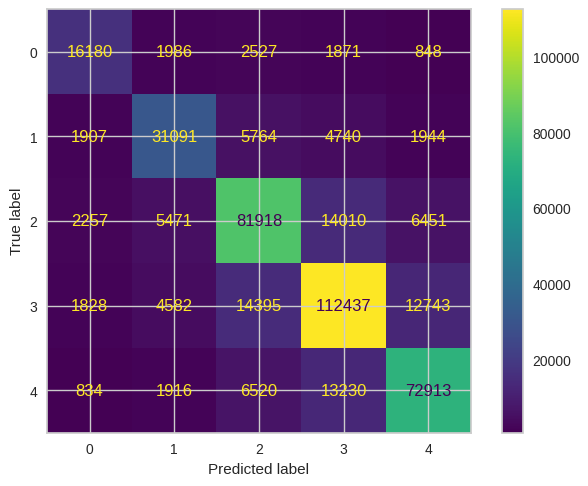

In [41]:
cm = confusion_matrix(y_test, y_pred, labels=modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.classes_)
disp.plot()

In [44]:
df.rating.value_counts()/len(df)

,count
rating,
4,0.346874
3,0.262149
5,0.227391
2,0.108108
1,0.055477


In [45]:
from sklearn.metrics import classification_report

In [46]:
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.70      0.69      0.70     23412
     class 1       0.69      0.68      0.69     45446
     class 2       0.74      0.74      0.74    110107
     class 3       0.77      0.77      0.77    145985
     class 4       0.77      0.76      0.77     95413

    accuracy                           0.75    420363
   macro avg       0.73      0.73      0.73    420363
weighted avg       0.75      0.75      0.75    420363



## optimizacion

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parameters = {
    'max_depth': [2],
    'min_samples_split': [2, 5, 10],  # Explore different values
    'min_samples_leaf': [1, 2, 4],   # Start with 1 and explore higher values
    'max_features': [2, 5, 10],      # Explore different values
    'random_state': [123],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0, 0.1],  # Explore different values
    'class_weight': [None],
    'ccp_alpha': [0.0, 0.01, 0.1]   # Explore different values
}

In [49]:
gridsearch = GridSearchCV(modelo, parameters)

In [50]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              monotonic_cst=None,
                                              random_state=None,
                                              splitter='best'),
             n_jobs=None,
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1], 'class_weight': [None],
                         'max_depth': [2], 'max_features': [2, 5, 10],
                         'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0, 0.1],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [123]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
y_pred1 = gridsearch.predict(X_test)

In [52]:
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4']
print(classification_report(y_test, y_pred1, target_names=target_names))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00     23412
     class 1       0.00      0.00      0.00     45446
     class 2       0.00      0.00      0.00    110107
     class 3       0.34      0.92      0.50    145985
     class 4       0.41      0.14      0.21     95413

    accuracy                           0.35    420363
   macro avg       0.15      0.21      0.14    420363
weighted avg       0.21      0.35      0.22    420363



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [53]:
accuracy_score(y_test, y_pred1)

0.3493361689777645

## algoritmos ridge

In [54]:
from sklearn.linear_model import Ridge

In [55]:
modelo1 = Ridge()

In [61]:
modelo1.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.41197e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, positive=False,
      random_state=None, solver='auto', tol=0.0001)

In [62]:
y_pred2 = modelo1.predict(X_test)

In [63]:
import numpy as np
from sklearn.metrics import accuracy_score

In [65]:

# Convert predictions to discrete classes before calculating accuracy
y_pred2_classes = np.round(y_pred2)  # Round predictions to nearest integer

# Calculate accuracy with the discretized predictions
accuracy = accuracy_score(y_test, y_pred2_classes)

print(accuracy)

0.3780565844282204


## Algoritmo GradientBoostingClassifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
modelo2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)

In [68]:
modelo2

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='log_loss', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [69]:
y_pred2 = modelo2.predict(X_test)

In [70]:
from sklearn.metrics import classification_report

In [71]:
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4']
print(classification_report(y_test, y_pred1, target_names=target_names))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00     23412
     class 1       0.00      0.00      0.00     45446
     class 2       0.00      0.00      0.00    110107
     class 3       0.34      0.92      0.50    145985
     class 4       0.41      0.14      0.21     95413

    accuracy                           0.35    420363
   macro avg       0.15      0.21      0.14    420363
weighted avg       0.21      0.35      0.22    420363



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
accuracy_score(y_test, y_pred2)

0.4076405392482212

### algoritmo random forest

In [73]:

from sklearn.ensemble import RandomForestClassifier

In [74]:
modelo3 = RandomForestClassifier(max_depth=2, random_state=0)
modelo3.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [75]:
y_pred3 = modelo3.predict(X_test)

In [76]:
from sklearn.metrics import classification_report

In [77]:
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4']
print(classification_report(y_test, y_pred3, target_names=target_names))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00     23412
     class 1       0.00      0.00      0.00     45446
     class 2       0.00      0.00      0.00    110107
     class 3       0.35      1.00      0.52    145985
     class 4       0.00      0.00      0.00     95413

    accuracy                           0.35    420363
   macro avg       0.07      0.20      0.10    420363
weighted avg       0.12      0.35      0.18    420363



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [78]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

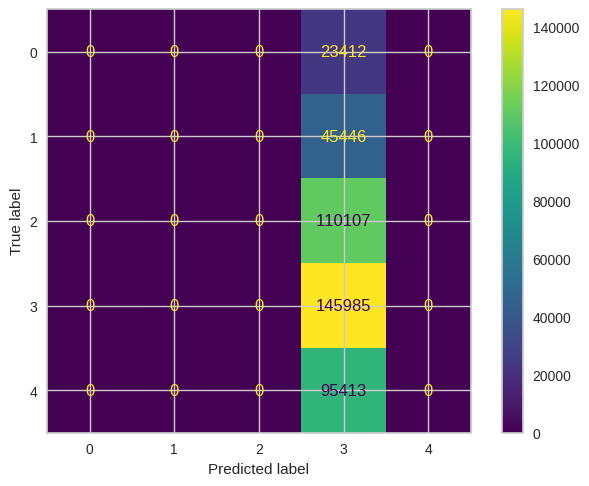

In [79]:
cm = confusion_matrix(y_test, y_pred3, labels=modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.classes_)
disp.plot()

In [80]:
y_test.value_counts()/len(y_test)

,count
rating,
3,0.347283
2,0.261933
4,0.226978
1,0.108111
0,0.055695


In [83]:
23412+45446+110107+145985+95413

420363

In [81]:
len(y_test)

420363


1. **Datos agregados**:
   - Agrupamos los datos por **edad**, **género** y **género de película**, y calculamos la calificación promedio para cada combinación.
   
2. **Visualización multivariada**:
   - Utilizamos un gráfico de dispersión en **Plotly**, donde:
     - El eje X representa la **edad**.
     - El eje Y muestra la **calificación promedio**.
     - El tamaño de los puntos indica la magnitud de las calificaciones promedio.
     - Los colores diferencian el **género de los usuarios**.

3. **Interpretación**:
   - Este análisis permite identificar tendencias en las calificaciones promedio dependiendo de la combinación de las tres variables clave.
   - Por ejemplo, podríamos observar si ciertos géneros de películas son mejor calificados por usuarios de una edad específica o si hay diferencias significativas según el género de los usuarios.

La gráfica interactiva facilita el análisis y la exploración de relaciones complejas entre estas variables.

 ## **<font color="DarkBlue">Conclusiones del análisis multivariado</font>**


<p align="justify">
El análisis del DataFrame <code>data</code>, que integra información de usuarios, películas y calificaciones, nos permitió comprender la interacción entre diversas variables clave, como la edad, el género de los usuarios, las calificaciones asignadas y los géneros de las películas.
<br><br>
A través del análisis multivariado, se destacaron patrones complejos que no serían evidentes con análisis univariados o bivariados. Por ejemplo:
<ul>
    <li>Se identificaron diferencias significativas en las calificaciones promedio según el género del usuario, la edad y el género cinematográfico.</li>
    <li>La visualización en múltiples facetas permitió observar cómo las preferencias por ciertos géneros de películas varían dependiendo de la edad y el género de los usuarios.</li>
    <li>El tamaño de las calificaciones promedio evidenció que los géneros cinematográficos más populares pueden no ser los más altamente valorados, destacando la importancia de considerar múltiples variables al mismo tiempo.</li>
</ul>
<p align="justify">
<br>
Este análisis no solo aporta información valiosa sobre las preferencias y patrones de comportamiento de los usuarios, sino que también sienta las bases para desarrollar sistemas de recomendación personalizados y más efectivos. Además, demuestra cómo el análisis multivariado, combinado con técnicas de visualización interactivas como <strong>Plotly</strong>, es una herramienta poderosa para extraer valor significativo de conjuntos de datos complejos.
<br><br>
En conclusión, el DataFrame <code>data</code> contiene un gran potencial para la exploración y modelado avanzado, donde el análisis multivariado es esencial para obtener una comprensión integral y tomar decisiones basadas en datos.
</p>


<br>
<br>
<p align="center"><b>
💗
<font color="DarkBlue">
Hemos llegado al final de nuestro colab de Pandas, a seguir codeando...
</font>
</p>